In [1]:
import numpy as np
import pandas as pd
from math import sqrt,acos,degrees
import matplotlib.pyplot as plt
from scipy.signal import resample
from tqdm.notebook import tqdm
from time import time
import os
import csv
from openpyxl import load_workbook
from Data_preparation_Library import *

## Data Extraction from Excel (Cumilative Function)

In [2]:
def emg_xlsx(workbook,typ):
    emg_labels = ['Frame','Sub Frame',
                 'EMG1',
                 'EMG2',
                 'EMG3',
                 'EMG4',
                 'EMG5',
                 'EMG6',
                 'EMG7',
                 'EMG8',
                 'EMG9',
                 'EMG10',
                 'EMG11',
                 'EMG12']
    
    sheet = workbook.active
    if(typ=='b'):
        table = sheet['BO6':'BZ92005']
        frames = sheet['A6':'B92005']
    else:
        table = sheet['BO6':'BZ54005']
        frames = sheet['A6':'B54005']
    table = tuple(table)
    frames = tuple(frames)
    frames_arr = []
    emg_arr = []
    for t in range(len(table)):
        row = []
        for i in range(12):
            row.append(table[t][i].value)
        frame = []
        for i in range(2):
            frame.append(frames[t][i].value)
        emg_arr.append(row)
        frames_arr.append(frame)

    emg_arr = np.array(emg_arr)
    frames_arr = np.array(frames_arr)

    emg_df = pd.DataFrame(columns=emg_labels)

    for i in range(2):
        emg_df[emg_labels[i]] = frames_arr[:,i]
    emg_labels = emg_labels[2:]
    for i in range(12):
        emg_df[emg_labels[i]] = emg_arr[:,i]
    return emg_df

def marker_xlsx(workbook,typ):
    marker_labels = ['Frame','Sub Frame',
                  'RSHO_X','RSHO_Y','RSHO_Z',
                  'RUPA_X','RUPA_Y','RUPA_Z',
                  'RELB_X','RELB_Y','RELB_Z',
                  'RM1_X','RM1_Y','RM1_Z',
                 'RFRM_X','RFRM_Y','RFRM_Z',
                 'WRM2_X','WRM2_Y','WRM2_Z',
                 'RWRA_X','RWRA_Y','RWRA_Z',
                 'RWRB_X','RWRB_Y','RWRB_Z',
                 'RFIN_X','RFIN_Y','RFIN_Z']
    sheet = workbook.active
    if(typ=='b'):
        table = sheet['A92012':'AC96611']
    else:
        table = sheet['A54012':'AC56711']
    table = tuple(table)
    emg_arr = []
    for t in range(len(table)):
        row = []
        for i in range(29):
            row.append(table[t][i].value)
        emg_arr.append(row)
    emg_arr = np.array(emg_arr)
    marker_df = pd.DataFrame(columns=marker_labels)
    for i in range(29):
        marker_df[marker_labels[i]] = emg_arr[:,i]
    return marker_df

def extract_df_xlsx(filename,typ):
    workbook = load_workbook(filename)
    emg_df = emg_xlsx(workbook,typ)
    marker_df = marker_xlsx(workbook,typ)
    return emg_df, marker_df

In [3]:
filename = file = 'Subjects/Nikhil/marker_data/Hammer.xlsx'
emg_labels = ['EMG1','EMG2','EMG3','EMG4','EMG5','EMG6','EMG7','EMG8']
angle_lables = ['Pronation_Angle','Flexion_Angle',  'Radial_Angle','Elbow_Joint_Angle']
emg_df, marker_df = extract_df_xlsx(filename,'c')

In [4]:
marker_df

,Frame,Sub Frame,RSHO_X,RSHO_Y,RSHO_Z,RUPA_X,RUPA_Y,RUPA_Z,RELB_X,RELB_Y,...,WRM2_Z,RWRA_X,RWRA_Y,RWRA_Z,RWRB_X,RWRB_Y,RWRB_Z,RFIN_X,RFIN_Y,RFIN_Z
0,1.0,0.0,-163.988,1347.49,1544.01,-310.383,1353.91,1522.48,-425.044,1362.54,...,1535.79,-688.121,1274.76,1525.29,-690.515,1343.20,1511.00,-784.872,1318.92,1531.15
1,2.0,0.0,-163.998,1347.50,1543.99,-310.392,1353.90,1522.51,-425.070,1362.51,...,1535.93,-688.026,1274.66,1525.35,-690.536,1343.11,1511.16,-784.866,1318.77,1531.35
2,3.0,0.0,-164.012,1347.50,1544.01,-310.398,1353.89,1522.53,-425.071,1362.51,...,1536.06,-688.061,1274.56,1525.55,-690.548,1343.02,1511.31,-784.860,1318.64,1531.53
3,4.0,0.0,-164.033,1347.51,1544.00,-310.428,1353.91,1522.57,-425.082,1362.51,...,1536.21,-688.073,1274.46,1525.72,-690.562,1342.94,1511.47,-784.874,1318.53,1531.74
4,5.0,0.0,-164.066,1347.52,1544.02,-310.419,1353.91,1522.60,-425.093,1362.53,...,1536.38,-688.212,1275.64,1525.36,-690.568,1342.86,1511.63,-784.846,1318.43,1531.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,2696.0,0.0,-155.393,1344.36,1547.35,-298.964,1369.38,1538.79,-415.303,1395.56,...,1591.56,-674.966,1322.16,1585.13,-676.913,1390.13,1570.80,-761.750,1369.76,1614.33
2696,2697.0,0.0,-155.509,1344.36,1547.38,-299.246,1368.82,1538.88,-415.590,1394.37,...,1590.19,-675.897,1322.25,1583.46,-677.305,1390.26,1569.33,-762.602,1370.09,1612.23
2697,2698.0,0.0,-155.658,1344.33,1547.39,-299.499,1368.24,1538.91,-415.925,1393.26,...,1588.91,-676.783,1322.34,1581.81,-677.630,1390.62,1567.96,-763.442,1370.21,1610.14
2698,2699.0,0.0,-155.752,1344.29,1547.35,-299.752,1367.69,1538.90,-416.242,1392.29,...,1587.57,-677.625,1322.41,1580.21,-677.795,1390.93,1566.85,-764.215,1370.54,1608.10


## Finding RDTM

In [5]:
marker_df.columns

Index(['Frame', 'Sub Frame', 'RSHO_X', 'RSHO_Y', 'RSHO_Z', 'RUPA_X', 'RUPA_Y',
       'RUPA_Z', 'RELB_X', 'RELB_Y', 'RELB_Z', 'RM1_X', 'RM1_Y', 'RM1_Z',
       'RFRM_X', 'RFRM_Y', 'RFRM_Z', 'WRM2_X', 'WRM2_Y', 'WRM2_Z', 'RWRA_X',
       'RWRA_Y', 'RWRA_Z', 'RWRB_X', 'RWRB_Y', 'RWRB_Z', 'RFIN_X', 'RFIN_Y',
       'RFIN_Z'],
      dtype='object')

In [6]:
RFIN = marker_df[['RFIN_X', 'RFIN_Y','RFIN_Z']].values
RWRA = marker_df[['RWRA_X','RWRA_Y', 'RWRA_Z']].values
RWRB = marker_df[['RWRB_X', 'RWRB_Y','RWRB_Z']].values
MID = (np.array(RWRB) + np.array(RWRA))/2

## Find RDTM of One Frame

In [7]:
import Geometry3D as G3D
from math import sin, cos, radians

In [8]:
A = RFIN[0]
B = MID[0]
D = RWRB[0]
E = RWRA[0]
theta = radians(30) # degrees

In [61]:
pA = G3D.Point(A[0],A[1],A[2])
pB = G3D.Point(B[0],B[1],B[2])
pD = G3D.Point(D[0],D[1],D[2])
pE = G3D.Point(E[0],E[1],E[2])
plane = G3D.Plane(pA,pB,pD)

In [62]:
## EQ of Line AC - lv,mv,nv
BD = G3D.Line(pB,pD)
lv,mv,nv = BD.dv

In [63]:
## EQ of Line BC - l,m,n
a,b,c,d = plane.general_form()

In [64]:
m = (cos(theta) - sin(theta)*b*lv/nv - (sin(theta)*a*lv**2)/nv*mv - sin(theta)*nv/mv)
m = m / ((lv**2 + mv**3 + nv**2)/mv)
l = sin(theta)*b/nv + lv*sin(theta)*a/(nv*mv) + lv*m/mv
n = (sin(theta)*a + nv*m)/mv

In [49]:
y = (pA.x - pA.y*lv/mv + pB.y*l/m - pB.x)*(l/m - lv/mv)
x = (y*l - pB.y*l)/m + pB.x
# x = (y*lv - pA.y*lv)/m + pA.x
z = (nv*y - pA.y*nv)/mv + pA.z

In [68]:
ac = G3D.Vector([lv,mv,nv])
bc = G3D.Vector([l,m,n])
line_AC = G3D.Line(pA,ac)
line_BC = G3D.Line(pB,bc)
G3D.intersection(line_AC,line_BC)

Point(-784.8216771794785, 1317.481364312244, 1531.4503814140567)

In [9]:
def get_RDTM(A,B,D,theta):
    pA = G3D.Point(A[0],A[1],A[2])
    pB = G3D.Point(B[0],B[1],B[2])
    pD = G3D.Point(D[0],D[1],D[2])
    
    plane = G3D.Plane(pA,pB,pD)
    a,b,c,d = plane.general_form()
    
    BD = G3D.Line(pB,pD)
    lv,mv,nv = BD.dv

    m = (cos(theta) - sin(theta)*b*lv/nv - (sin(theta)*a*lv**2)/nv*mv - sin(theta)*nv/mv)
    m = m / ((lv**2 + mv**3 + nv**2)/mv)
    l = sin(theta)*b/nv + lv*sin(theta)*a/(nv*mv) + lv*m/mv
    n = (sin(theta)*a + nv*m)/mv
    
    ac = G3D.Vector([lv,mv,nv])
    bc = G3D.Vector([l,m,n])
    line_AC = G3D.Line(pA,ac)
    line_BC = G3D.Line(pB,bc)
    
    return G3D.intersection(line_AC,line_BC)
    

In [10]:
get_RDTM(A,B,D,theta)

Point(-784.8216771794785, 1317.481364312244, 1531.4503814140567)

In [11]:
get_RDTM(A,B,D,90-theta)

Point(-784.653399580928, 1312.670621269304, 1532.4548454421633)

## RDTM Angles

In [26]:
def get_RDTM_df(marker_df, theta):
    RFIN = marker_df[['RFIN_X', 'RFIN_Y','RFIN_Z']].values
    RWRB = marker_df[['RWRB_X', 'RWRB_Y','RWRB_Z']].values
    WRM2 = marker_df[['WRM2_X', 'WRM2_Y','WRM2_Z']].values
    MID = (np.array(RWRB) + np.array(RWRA))/2
    theta = radians(30) # degrees

    A_all= RFIN
    B_all= MID
    D_all= RWRB

    RDTM_all = []
    for i in range(marker_df.shape[0]):
        A = A_all[i]
        B = B_all[i]
        D = D_all[i]
        rdtm = [get_RDTM(A,B,D,theta).x, get_RDTM(A,B,D,theta).y, get_RDTM(A,B,D,theta).z]
        RDTM_all.append(rdtm)

    return np.array(RDTM_all)

In [27]:
def angles_lines(p1,p2,mid,deg=False):
    u = np.array(p1)-np.array(mid)
    v = np.array(p2)-np.array(mid)
    i1,j1,k1 = u[:,0],u[:,1],u[:,2]
    i2,j2,k2 = v[:,0],v[:,1],v[:,2]
    angles = []
    for t in range(len(i1)):
        cos_t = abs(i1[t]*i2[t]+j1[t]*j2[t]+k1[t]*k2[t])
        cos_t = cos_t/(sqrt(i1[t]**2+j1[t]**2+k1[t]**2)*sqrt(i2[t]**2+j2[t]**2+k2[t]**2))
        if deg==False:
            angles.append(acos(cos_t))  
        if deg==True:
            angles.append(degrees(acos(cos_t)))
    return np.array(angles)

In [31]:
all_RDTM = get_RDTM_df(marker_df, 30)
all_RDTM.shape

(2700, 3)

In [32]:
WRM2 = marker_df[['WRM2_X', 'WRM2_Y','WRM2_Z']].values
MID = (np.array(RWRB) + np.array(RWRA))/2
dtm_anles = angles_lines(all_RDTM,WRM2,MID,deg=True)

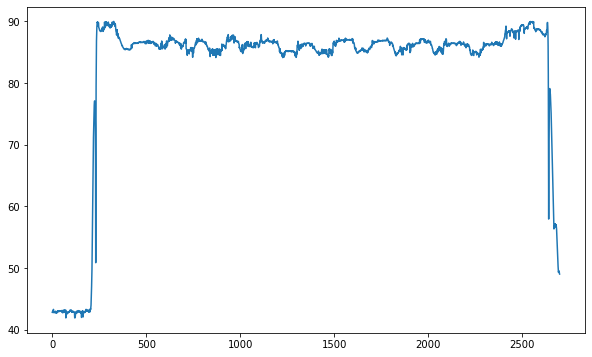

In [33]:
plt.figure(figsize=(10,6))
plt.plot(dtm_anles)